# Day 1 :Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the dataset
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Day 2: Data Cleaning.
# 1. Data cleaning.

# 1.1 Check for null values in columns in data set.

In [22]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        22
Churn                0
dtype: int64

# 1.2 Handle Missing Values

Decide how to handle missing values. For example, you can drop rows with missing values or fill them with a specific value. If there are only a few missing values, you might choose to drop those rows:

- Drop rows with missing values: 
- If there are many missing values, you might fill them with a value like the mean or median:
- Fill missing values with the median of each column:

In [23]:
#Drop rows with missing values: 
data.dropna(inplace=True)
#Fill missing values with the median of each column:
#data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# 1.3 Encode Categorical Variables

- Identify catagorical values
- but we must first make new feature for feature engineering down the line before encoding.

In [24]:
# Create an interaction term between MonthlyCharges and tenure
data['MonthlyCharges_tenure'] = data['MonthlyCharges'] * data['tenure']
# Create an average monthly charge feature
data['AvgMonthlyCharge'] = data['TotalCharges'] / data['tenure'] + 1
# Create tenure category
data['tenure_category'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0-12', '12-24', '24-48', '48-60', '60+'])
# Log transform skewed features
data['MonthlyCharges_log'] = np.log1p(data['MonthlyCharges'])

- Replace few column values to relavent alternatives.

In [25]:
# Merge categories
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service': 'No'})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service': 'No'})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service': 'No'})
data['TechSupport'] = data['TechSupport'].replace({'No internet service': 'No'})
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service': 'No'})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service': 'No'})

In [26]:
# list of catagorical values 
cat_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'customerID' and col !='TotalCharges']
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


- Encode these categorical variables. One common method is one-hot encoding:

In [27]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [ ]:
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod'
]

# One-hot encode appropriate categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [28]:
print(len(data.columns))

29


In [29]:
data.dtypes

customerID                                 object
SeniorCitizen                               int64
tenure                                      int64
MonthlyCharges                            float64
TotalCharges                              float64
MonthlyCharges_tenure                     float64
AvgMonthlyCharge                          float64
tenure_category                          category
MonthlyCharges_log                        float64
gender_Male                                  bool
Partner_Yes                                  bool
Dependents_Yes                               bool
PhoneService_Yes                             bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_Yes                           bool
OnlineBackup_Yes                             bool
DeviceProtection_Yes                         bool
TechSupport_Yes                              bool


# 1.4 Scale Numerical Features (if necessary)

- identify numerical values

In [30]:
num_cols = data.select_dtypes(include= ['int64', 'float64']).columns
print(num_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MonthlyCharges_tenure', 'AvgMonthlyCharge', 'MonthlyCharges_log'],
      dtype='object')


- scale numerical values

In [31]:
scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

# Day 3: EDA

# univariate analysis

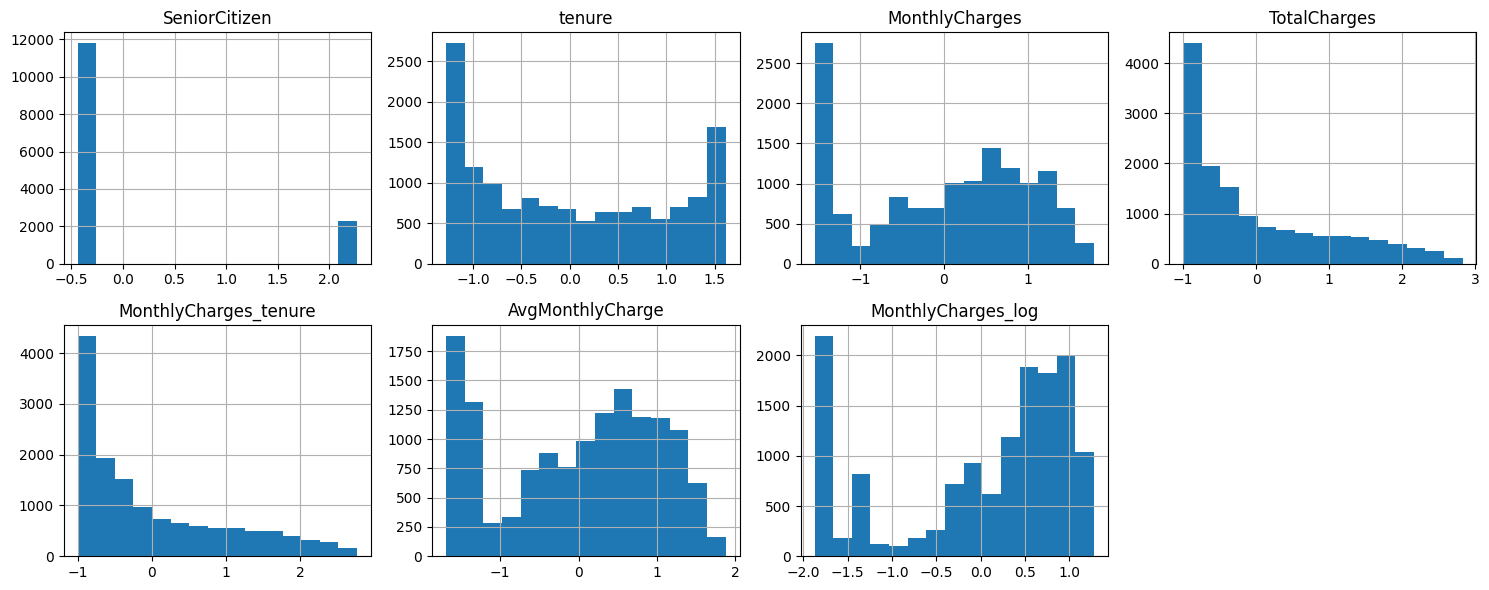

In [32]:
# we start with creating histogram of numerical values

data[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

# Bivariate Analysis

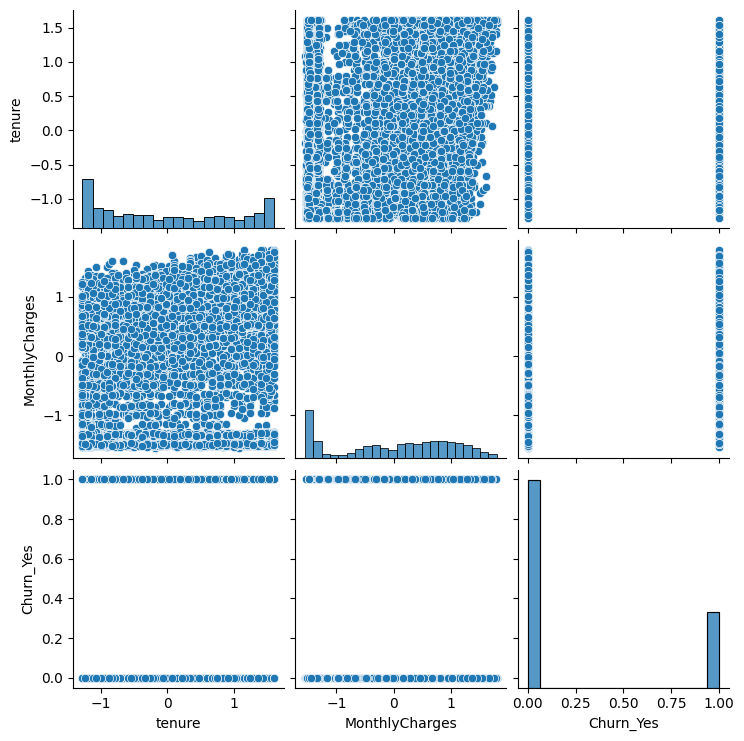

In [33]:
# Create pair plots for a subset of columns (for better visualization)
sns.pairplot(data[['tenure', 'MonthlyCharges', 'Churn_Yes']])
plt.show()

# Target Variable Analysis

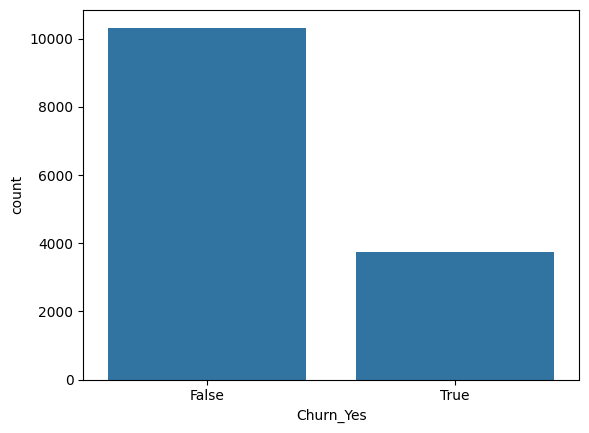

In [34]:
# Analyze the distribution of the target variable
sns.countplot(x='Churn_Yes', data=data)
plt.show()

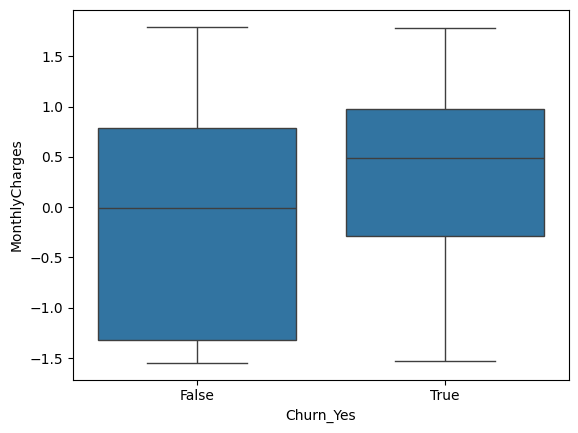

In [35]:
# Relationship between MonthlyCharges and Churn
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=data)
plt.show()

# Day 4: Feature Engineering and Selection

- 4.1 Create New Features

- Interaction Terms:
Interaction terms capture the combined effect of two or more features.
- Example: Creating an interaction term between MonthlyCharges and tenure.

In [36]:
# Create an interaction term between MonthlyCharges and tenure
data['MonthlyCharges_tenure'] = data['MonthlyCharges'] * data['tenure']

- Aggregate Features:
Aggregate features are created by aggregating existing features.
- Example: Creating a feature that represents the average monthly charge.

In [37]:
# Create an average monthly charge feature
data['AvgMonthlyCharge'] = data['TotalCharges'] / (data['tenure'] + 1)

- Domain-Specific Features:
Create features based on domain knowledge.
- Example: Categorizing customers based on tenure length.

In [39]:
# Create tenure category
data['tenure_category'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0-12', '12-24', '24-48', '48-60', '60+'])

- Log Transformation:
Apply log transformation to features with a skewed distribution.

In [41]:
# Log transform skewed features
data['MonthlyCharges_log'] = np.log1p(data['MonthlyCharges'])

- 4.2 Update Your DataFrame: 
After creating new features, ensure they are correctly added to your DataFrame.

In [42]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MonthlyCharges_tenure,AvgMonthlyCharge,tenure_category,MonthlyCharges_log,gender_Male,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,-0.440327,-1.280248,-1.161694,-0.994194,1.487256,3.547551,NaN,NaN,False,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,-0.440327,0.064303,-0.260878,-0.173740,-0.016775,-0.163243,0-12,-0.302292,True,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,-0.440327,-1.239504,-0.363923,-0.959649,0.451084,4.006817,NaN,-0.452436,True,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,-0.440327,0.512486,-0.747850,-0.195248,-0.383263,-0.129091,0-12,-1.377733,True,...,True,False,False,True,False,False,False,False,False,False
4,9237-HQITU,-0.440327,-1.239504,0.196178,-0.940457,-0.243164,3.926687,NaN,0.179132,False,...,False,False,False,False,False,True,False,True,False,True


In [43]:
data.isnull().sum()

customerID                                  0
SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                                0
MonthlyCharges_tenure                       0
AvgMonthlyCharge                            0
tenure_category                          7528
MonthlyCharges_log                       3442
gender_Male                                 0
Partner_Yes                                 0
Dependents_Yes                              0
PhoneService_Yes                            0
MultipleLines_Yes                           0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_Yes                          0
OnlineBackup_Yes                            0
DeviceProtection_Yes                        0
TechSupport_Yes                             0
StreamingTV_Yes                             0
StreamingMovies_Yes               